### Importing the basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [3]:
df = pd.read_csv('tested.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 12)

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
# As the number of non null values for 'Cabin' column is very small, i.e. there is a lot of missing data (about 78%), 
# thus we are dropping it.
df.drop(columns=['Cabin'],inplace=True)

In [10]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
# Filling the missing value of "Fare" column with mean
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [12]:
#The distribution of age is normal, so filling the missing values with mean +- std
low_range = df['Age'].mean() - df['Age'].std()
upper_range = df['Age'].mean() + df['Age'].std()
size = 86
age = np.random.randint(low_range,upper_range,size)
print(age)

[30 23 23 19 22 24 33 35 30 18 41 24 23 20 17 39 40 30 37 20 18 40 31 27
 20 42 23 28 31 43 40 21 32 36 31 43 20 26 40 18 31 24 40 19 30 21 34 21
 40 36 29 35 37 25 16 27 18 41 22 34 37 25 33 36 42 30 32 27 41 27 42 18
 26 28 23 30 18 18 25 27 37 23 23 21 20 43]


In [13]:
df['Age'][df['Age'].isnull()] = age

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

#### Analysing each column one by one

In [15]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

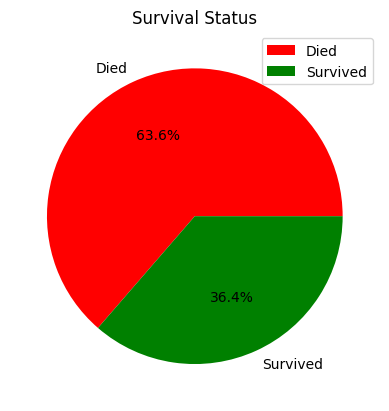

In [16]:
plt.pie(
    df['Survived'].value_counts().sort_values(ascending=False),
    labels = ['Died','Survived'],
    colors=["Red", "Green"],
    autopct="%1.1f%%",

)

# Adding a legend to the pie chart
plt.legend(["Died", "Survived"], loc="upper right")

plt.title('Survival Status')
plt.show()

In [17]:
survivors = df[df['Survived'] == 1]
survivors 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
410,1302,1,3,"Naughton, Miss. Hannah",female,23.0,0,0,365237,7.7500,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S


<AxesSubplot: xlabel='Survived', ylabel='count'>

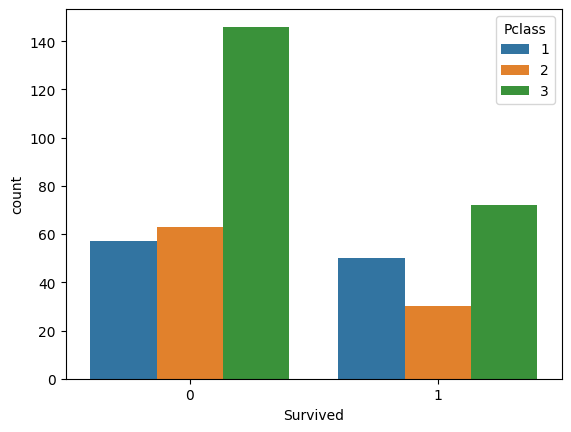

In [18]:
#Analysing the column 'PClass'
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [19]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

<AxesSubplot: xlabel='Survived', ylabel='count'>

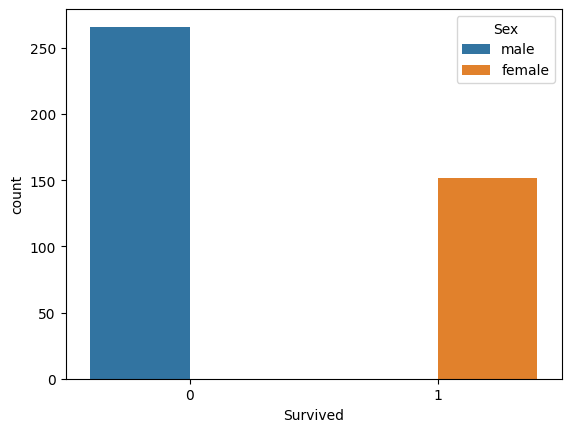

In [20]:
# Analysing the coulumn "Sex"
sns.countplot(x=df['Survived'], hue=df['Sex'])

In [21]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

In [22]:
# Analysing the coulumn "Embarked"
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Density'>

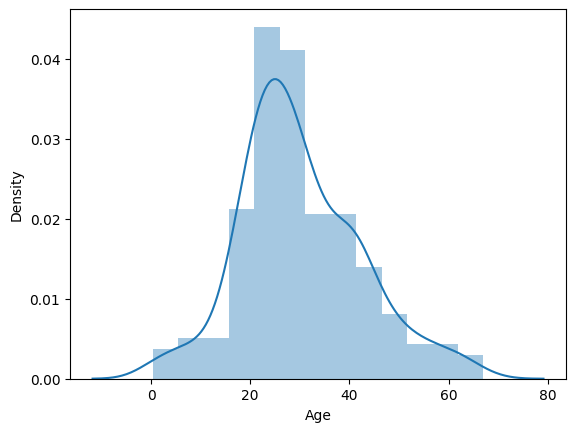

In [23]:
## Analysing the coulumn "Age"
sns.distplot(df['Age'][df['Survived']==0])

<AxesSubplot: xlabel='Age', ylabel='Density'>

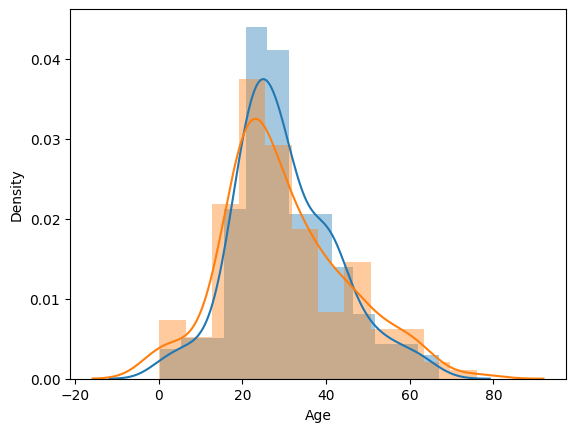

In [24]:
sns.distplot(df['Age'][df['Survived']==0])
sns.distplot(df['Age'][df['Survived']==1])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

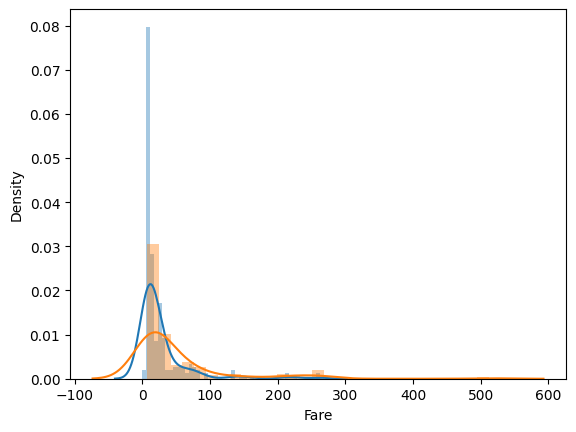

In [25]:
# Analysing the coulumn "Fare"
sns.distplot(df['Fare'][df['Survived']==0])
sns.distplot(df['Fare'][df['Survived']==1])

In [26]:
# As the column "Ticket" plays little or no role in survival status, so dropping it 
df.drop(columns=['Ticket'],inplace = True)

In [27]:
# Making a new column for family
df['family'] = df['SibSp'] + df['Parch'] + 1
df['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

In [28]:
df.groupby(['family'])['Survived'].mean()

family
1     0.268775
2     0.486486
3     0.526316
4     0.714286
5     0.285714
6     0.666667
7     0.250000
8     0.500000
11    0.500000
Name: Survived, dtype: float64

In [29]:
def family_size(members):
    if members == 1: 
        return "Alone"
    elif members >1 and members<5:
        return "Medium"
    else:
        return "Large"

In [30]:
df['family_size'] = df['family'].apply(family_size)

In [31]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone


In [32]:
# Since we already have the column family_size , we can drop the columns - 'SibSp', 'Parch', 'family'
df.drop(columns = ['SibSp', 'Parch', 'family'], inplace = True)

In [33]:
#Dropping the columns which are not required for classification
df.drop(columns = ['Name', 'PassengerId','Fare'], inplace = True)
## Note - We are dropping the column 'Fare' because it is related to the column 'Pclass' and keeping it can cause redudancy

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,34.5,Q,Alone
1,1,3,female,47.0,S,Medium
2,0,2,male,62.0,Q,Alone
3,0,3,male,27.0,S,Alone
4,1,3,female,22.0,S,Medium


In [35]:
df = pd.get_dummies(df,columns=['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [36]:
df.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,34.5,0,1,1,1,0,0,0
1,1,47.0,0,1,0,0,1,0,1
2,0,62.0,1,0,1,1,0,0,0
3,0,27.0,0,1,1,0,1,0,0
4,1,22.0,0,1,0,0,1,0,1


In [37]:
df.shape

(418, 9)

In [38]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [39]:
print(X)

[[34.5  0.   1.  ...  0.   0.   0. ]
 [47.   0.   1.  ...  1.   0.   1. ]
 [62.   1.   0.  ...  0.   0.   0. ]
 ...
 [38.5  0.   1.  ...  1.   0.   0. ]
 [20.   0.   1.  ...  1.   0.   0. ]
 [43.   0.   1.  ...  0.   0.   1. ]]


In [40]:
print(y)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


## Splitting the Data into train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection 

In [43]:
# Importing all the required Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
classifiers = [LogisticRegression(random_state = 0),
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
               RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
               GaussianNB(),
               SVC(kernel = 'linear' , random_state = 0),
               SVC(kernel = 'rbf' , random_state = 0),
               KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2 )
              ]


In [45]:
for i in range(0,7):
    classifier = classifiers[i]
    print(classifier)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(accuracy_score(y_test,y_pred))

LogisticRegression(random_state=0)
[[52  0]
 [ 0 32]]
1.0
DecisionTreeClassifier(criterion='entropy', random_state=0)
[[52  0]
 [ 0 32]]
1.0
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
[[52  0]
 [ 0 32]]
1.0
GaussianNB()
[[52  0]
 [ 0 32]]
1.0
SVC(kernel='linear', random_state=0)
[[52  0]
 [ 0 32]]
1.0
SVC(random_state=0)
[[52  0]
 [ 0 32]]
1.0
KNeighborsClassifier()
[[52  0]
 [ 0 32]]
1.0


### Since the accuracy of all the model is 1, so we can choose any model.
### Still we would prefer logistic regression due to its simplicity and efficiency (in training).